# Electric Car Regression Analysis

## Basic Questions
- Which car has the fastest 0-100 acceleration?
- Which has the highest efficiency?
- Does a difference in power train effect the range, top speed, efficiency?
- Which manufacturer has the most number of vehicles?
- How does price relate to rapid charging?

## Columns Definition ( Some columns I need a clearer definition to help me understand the data better) 
1. **AccelSec**: 
    - Acceleration as 0-100 km/h. How fast a car can speed up.
    
2. **TopSpeed_KmH**: 
    - Maximum speed at which a car travels.
    
3. **Range_Km**: 
    - The distance it can travel a full charge for electric vehicles
    
4. **Efficiency_Whkm**:  
    - Metric used to measure the efficiency of an electric vehicle. 
    - How much energy an EV consumes to travel a certain distance.
    - A lower Wh/km indicates better efficiency. For example, a more efficient EV might have a Wh/km of less than 13, while an inefficient EV might have a Wh/km of more than 20. 

5. **FastCharge_KmH**:
    - When charging an electric vehicle (EV) quickly, kilowatt-hours (kWh) and kilowatts (kW) are used to measure the amount of energy delivered and the rate at which it's delivered

6. **Rapid_Charge**:
    - Rapid charging is a technology that allows an electric vehicle (EV) to charge quickly, usually within 30-60 minutes. It's often associated with DC fast charging (DCFC) systems, which use direct current (DC) to supply power

7. **Plug Type**: 
    - Depends on Vehicle and Type of Charging



In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r"C:\Users\Emily\OneDrive\Desktop\Online Dataset\Kaggle Dataset\ElectricCarData_Clean.csv")
df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


## DataFrame Overview

In [3]:
df.shape

(103, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [5]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


## Insights:
- With 14 columns and 103 rows, our dataset is small and do not have a lot of data points
- Average price for an electric vehicle is around 56,000 Euro or 60,000 USD
- 150 WHkm is the threshhold for Efficiency Electric Vehicle. In our dataset, it shows that 189 is the average Whkm. Most brand does not reach the standard efficiency.
- Average distance for EV with full tank is 338. Comparing to gasoline (650 km), this number seems very limited.
- 7.3 km/h is average acceleration. It could be faster than most gasoline cars in the market.


## Answer Questions

### Which car has the fastest 0-100 acceleration?

In [6]:
df.sort_values(by='AccelSec', ascending=False)[['Model', 'AccelSec']].head(5)

,Model,AccelSec
68,Kangoo Maxi ZE 33,22.4
66,e-NV200 Evalia,14.0
77,EQ forfour,12.7
57,Twingo ZE,12.6
43,CITIGOe iV,12.3


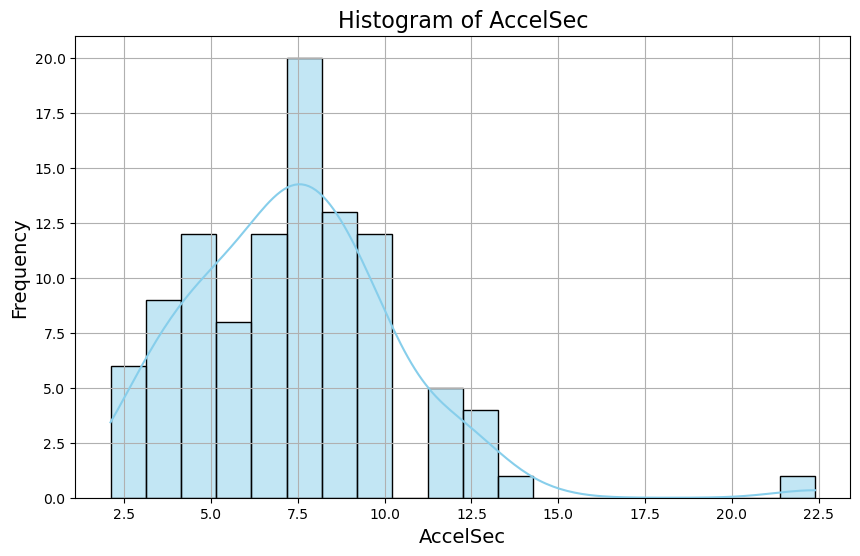

In [7]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for 'AccelSec'
sns.histplot(df['AccelSec'], bins=20, kde=True, color='skyblue')

# Add a title and labels
plt.title('Histogram of AccelSec', fontsize=16)
plt.xlabel('AccelSec', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

### Insights for Acceleration:
- Fast Acceleration car models are from smaller brands
- Most data points range from 2.5 to 10 km/h for acceleration

## Which car has the best efficiency ? 


In [8]:
df.sort_values(by = 'Efficiency_WhKm', ascending = True)[['Brand','Model', 'Efficiency_WhKm']].head(5)

,Brand,Model,Efficiency_WhKm
48,Lightyear,One,104
8,Tesla,Model 3 Standard Range Plus,153
14,Hyundai,IONIQ Electric,153
41,Hyundai,Kona Electric 39 kWh,154
74,Sono,Sion,156


In [9]:
# Group by 'Brand' and calculate the average 'Efficiency_WhKm'
average_efficiency_by_brand = (
    df.groupby('Brand')['Efficiency_WhKm']
    .mean()
    .reset_index()
    .sort_values(by='Efficiency_WhKm', ascending=True)  
)

# Display the top 10 results
average_efficiency_by_brand = average_efficiency_by_brand.head(15)
average_efficiency_by_brand


,Brand,Efficiency_WhKm
14,Lightyear,104.000000
10,Hyundai,155.666667
29,Sono,156.000000
19,Mini,156.000000
26,SEAT,166.000000
7,Fiat,168.000000
9,Honda,168.000000
25,Renault,170.400000
31,Volkswagen,170.875000
21,Opel,171.000000


C:\Users\Emily\AppData\Local\Temp\ipykernel_36092\2649953987.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Brand', y='Efficiency_WhKm', data=average_efficiency_by_brand, palette="viridis")


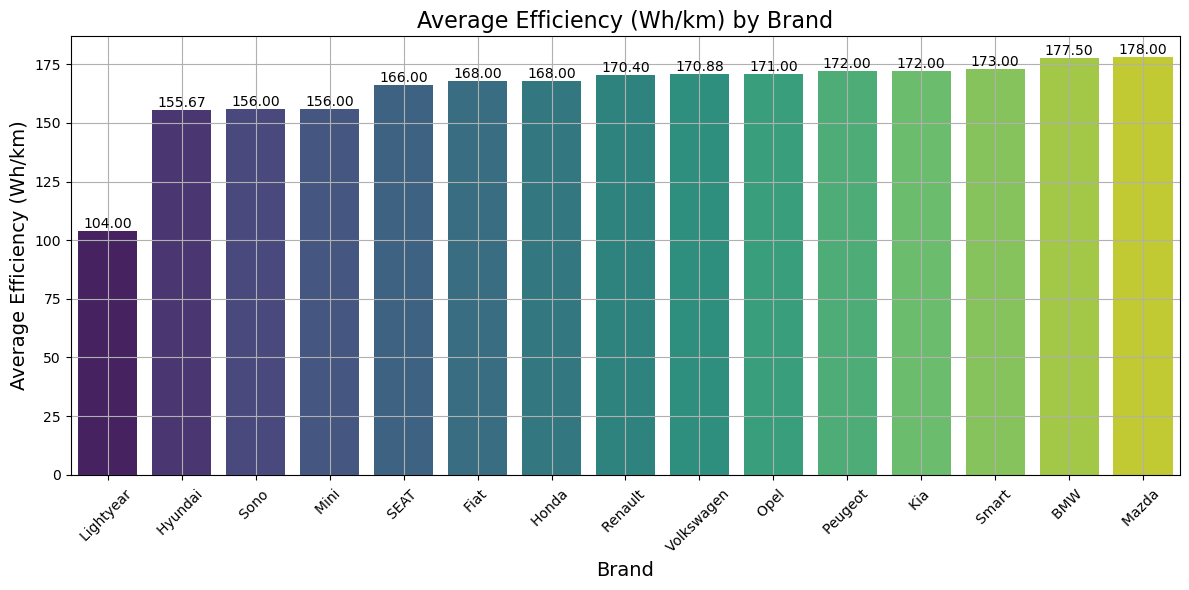

In [10]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar graph
bar_plot = sns.barplot(x='Brand', y='Efficiency_WhKm', data=average_efficiency_by_brand, palette="viridis")

# Add a title and labels
plt.title('Average Efficiency (Wh/km) by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Efficiency (Wh/km)', fontsize=14)

# Rotate x-axis labels for readability, if needed
plt.xticks(rotation=45)

# Add average efficiency text on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

### Insights for Efficiency:
- Lightyear One is the best model for efficiency. Number 2 is Tesla Model 3 Standard Range Plus.
- Hyundai, Fiat and Honda are Top Brands that are in the top 10 EV efficiency from Asia.
- European car brands are in the Top for EV efficiency. European Car MKT is more strict and has higher standard to produce an EV. 

###  Does a difference in power train effect the range, top speed, efficiency?

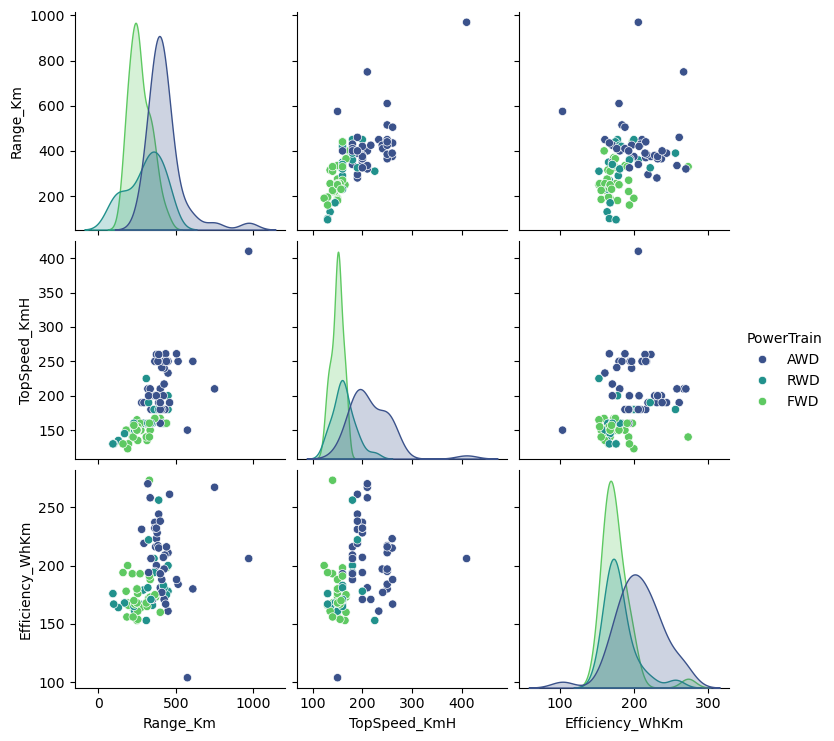

In [11]:
# Sample pair plot with hue for categorical variable
sns.pairplot(df, hue='PowerTrain', vars=['Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm'], palette='viridis')
plt.show()

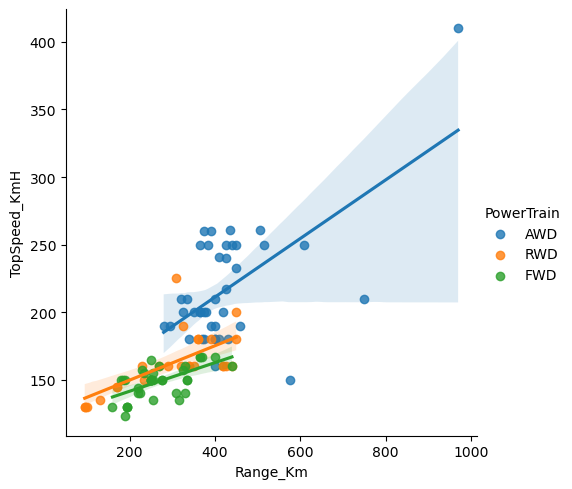

In [12]:
sns.lmplot(x="Range_Km", y="TopSpeed_KmH",
           hue="PowerTrain",
           data=df)

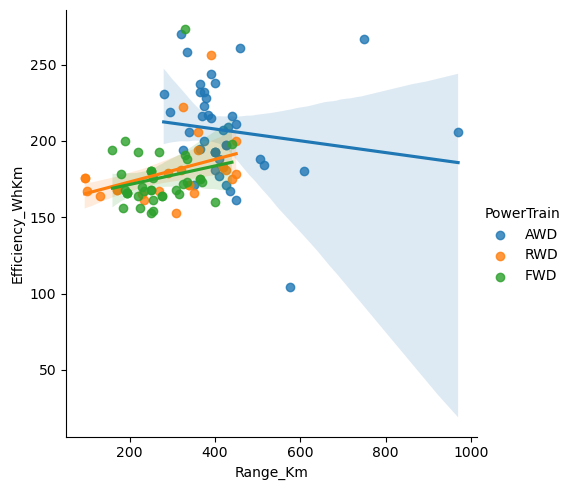

In [13]:
sns.lmplot(x="Range_Km", y="Efficiency_WhKm",
           hue="PowerTrain",
           data=df)

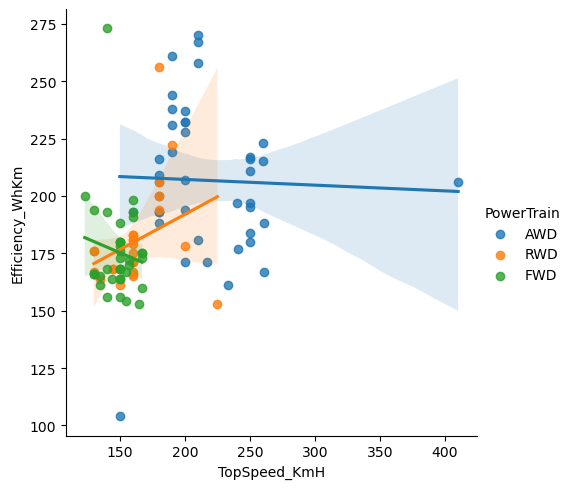

In [14]:
sns.lmplot(x="TopSpeed_KmH", y="Efficiency_WhKm",
           hue="PowerTrain",
           data=df)

### Insights for effect the range, top speed, efficiency:
- Top Speed and Range Km has the positive relationship in all power train. Easy explain: The faster you drive, the further you reach
- Range KM vs Efficiency:
    1. Positive Relation in RWD and FWD
    2. Negative Relation in AWD
    3. Characteristic of EV when driving long distance: AWD is not good for EV but RWD and FWD is ok. EV can only handle one side when driving far or over a number of hours.
- Top Speed vs Efficiency:
    1. Positive Relationship in RWD
    2. Negative Relationship in FWD and AWD
    3. Speeding up is only good for RWD. Not recommend for other Power Trains. 

### Which manufacturer has the most number of vehicles?

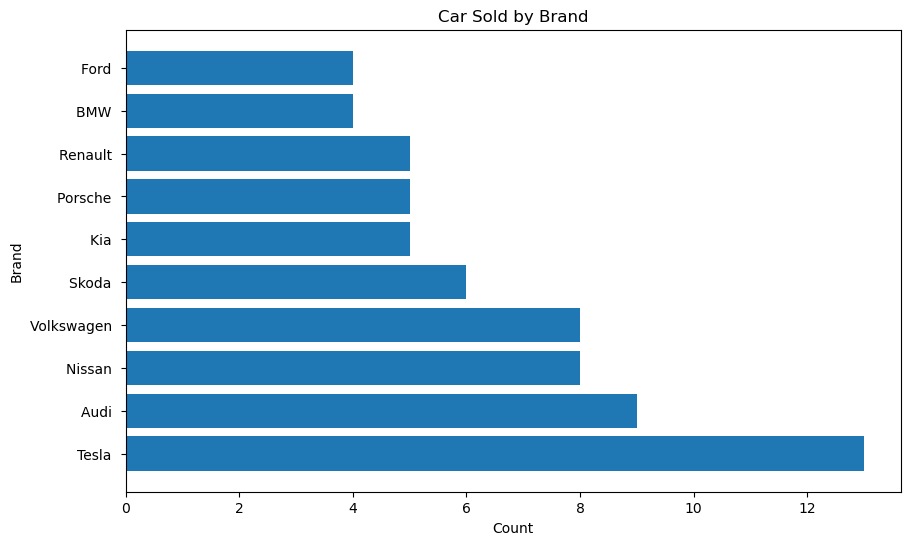

In [15]:
count_car_sold = df.groupby(['Brand']).size().sort_values(ascending = False).head(10)
count_car_sold

plt.figure(figsize=(10, 6))
plt.barh(count_car_sold.index, count_car_sold.values)
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Car Sold by Brand')
plt.show()

<Axes: xlabel='RapidCharge', ylabel='PriceEuro'>

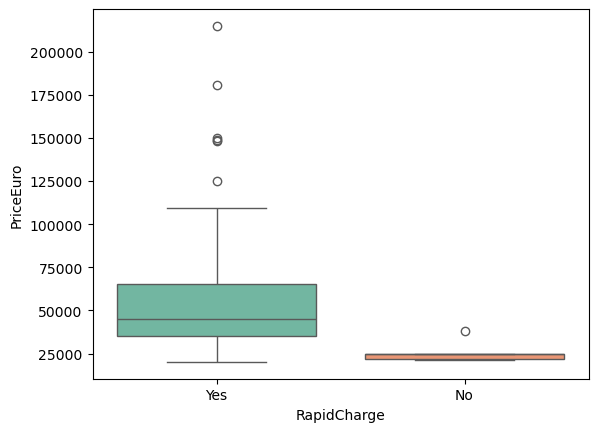

In [16]:
sns.boxplot(x='RapidCharge', y='PriceEuro', hue='RapidCharge', data=df, palette='Set2', legend=False)


### Insights:
- Tesla is has the most car sold (Most Successful Brand)
- Fast Charge plays an important role in EV Market. Fast Charge EVs are placed with higher price compared to No Rapid Charge EVs.

## Regression Analysis

- Practice Regression Algorithm Method to predict Price of EVs
- Test what algorithm will have the best predictions

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv(r"C:\Users\Emily\OneDrive\Desktop\Online Dataset\Kaggle Dataset\ElectricCarData_Clean.csv")

picked_data = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']]
picked_data.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro
0,4.6,233,450,161,940,55480
1,10.0,160,270,167,250,30000
2,4.7,210,400,181,620,56440
3,6.8,180,360,206,560,68040
4,9.5,145,170,168,190,32997


In [18]:
# Remove row where FastCharge_KmH has "-"
picked_data = picked_data[picked_data['FastCharge_KmH'] != '-']

# Convert column FastCharge_KmH to float 64
picked_data['FastCharge_KmH'] = picked_data['FastCharge_KmH'].astype(float)
picked_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccelSec         98 non-null     float64
 1   TopSpeed_KmH     98 non-null     int64  
 2   Range_Km         98 non-null     int64  
 3   Efficiency_WhKm  98 non-null     int64  
 4   FastCharge_KmH   98 non-null     float64
 5   PriceEuro        98 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 5.4 KB


## Testing if data is normally distributed using 3 methods:
- QQ Plot
- Seaborn Histogram and Kdeplot
- Pandas Skew Function



In [19]:
# Skew function of Pandas
old_skew = picked_data.skew().sort_values(ascending=False)
old_skew

PriceEuro          2.210252
TopSpeed_KmH       1.944012
Range_Km           1.828356
Efficiency_WhKm    0.813916
FastCharge_KmH     0.649778
AccelSec           0.150823
dtype: float64

- Positive value means the distribution is skewed to the right.
- Negative value means the distribution is skewed to the left.
- 0 means perfect normal distribution. The bell shaped curve.

### Insights:
- All continuous features are skewing to the right
- Top features which skewed the most are PriceEuro and TopSpeed_KmH

### Visualization using Histogram and QQ Plot

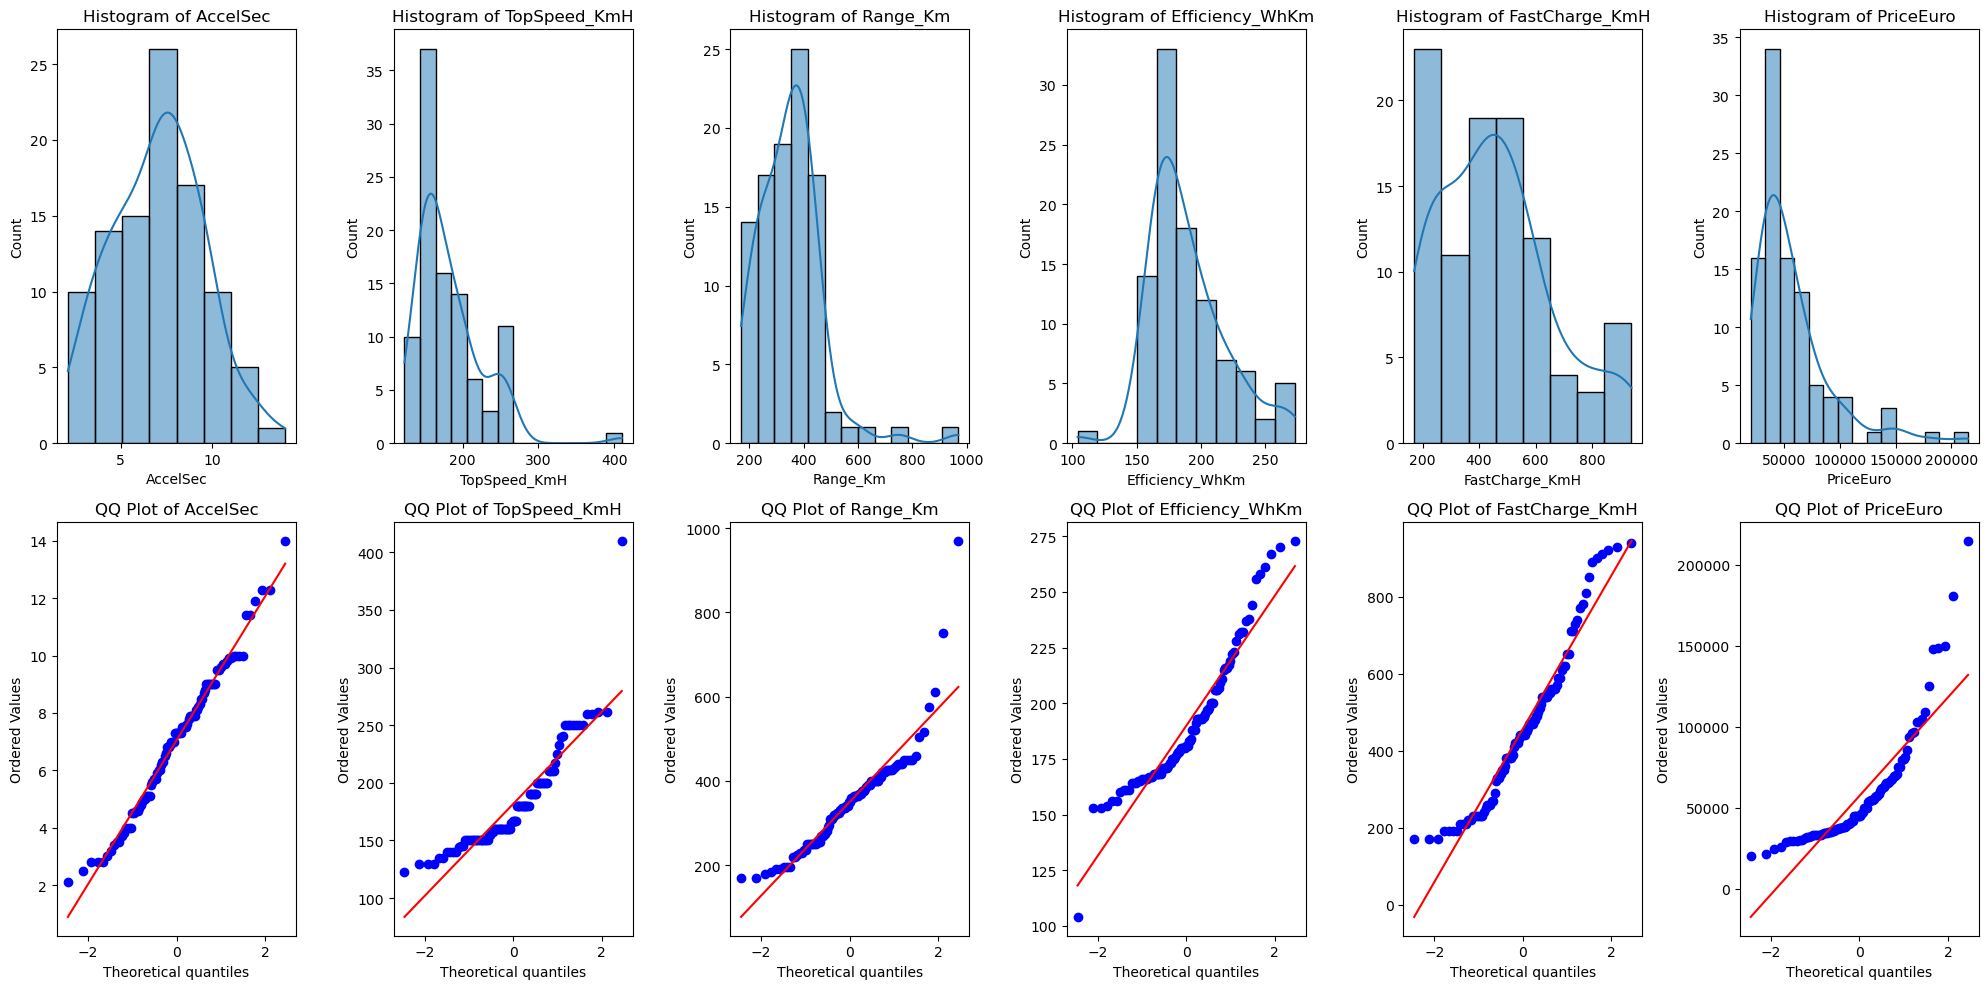

In [20]:
# Set up the figure with a 2x6 grid for 12 subplots (6 histograms + 6 QQ plots)
plt.figure(figsize=(20, 10))

# Loop for histograms with KDE
for i, column in enumerate(picked_data.columns[:6]):  # Assuming 6 columns to visualize
    plt.subplot(2, 6, i + 1)  # First row for histograms
    sns.histplot(picked_data[column], kde=True)  # Histogram with KDE line
    plt.title(f'Histogram of {column}')

# Loop for QQ plots
for i, column in enumerate(picked_data.columns[:6]):  # Same columns for QQ plots
    plt.subplot(2, 6, i + 7)  # Second row for QQ plots
    stats.probplot(picked_data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')

plt.tight_layout()  
plt.show()

### Transformation Methods Comparison to Normalize Distributed Columns
- I want to practice some popular transformation to normalize my features
- I will pick PriceEuro as the column to apply transformations since it is the most right skewed
- Transformation to use:
  - Log Transformation
  - Square Root Tranformation
  - Retriprocal Transformation
  - CUBE Transformation
  - BOX COX Tranformation
  - YEO-JOHNSON Transformation

### Log Transformation

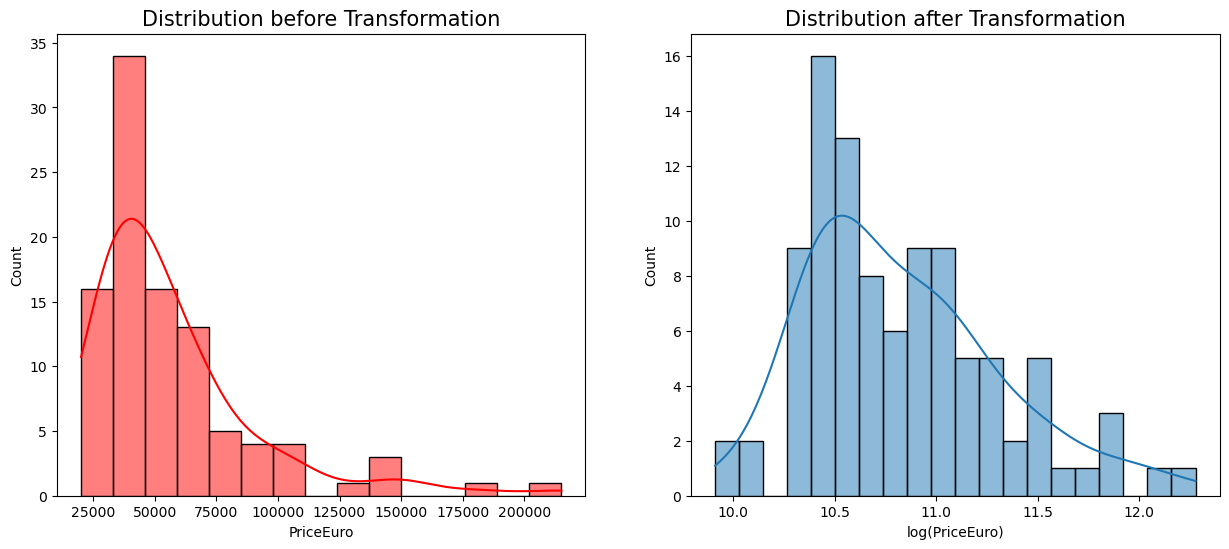

Skewness was 2.21 before & is 0.8 after log transformation.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Assuming picked_data is your DataFrame
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()
    
    # Set up the log transformation
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p, validate=True), [feature])])

    plt.figure(figsize=(15, 6))
    
    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(picked_data[feature], kde=True, color="red")
    
    # Applying the log transformation
    df_log = logTr.fit_transform(picked_data)
    
    # Convert transformed data back to DataFrame
    df_log = pd.DataFrame(df_log, columns=[f'log_{feature}'])
    
    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log[f'log_{feature}'], bins=20, kde=True, legend=False)
    plt.xlabel(f'log({feature})')
    plt.show()
    
    # Display skewness before and after transformation
    new_skew = df_log[f'log_{feature}'].skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after log transformation.")
    
# Call the function specifically for AccelSec
logTrans(feature="PriceEuro")


### Square Root transformation

C:\Users\Emily\AppData\Local\Temp\ipykernel_36092\1386082710.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  picked_data[feature].fillna(picked_data[feature].mean(), inplace=True)


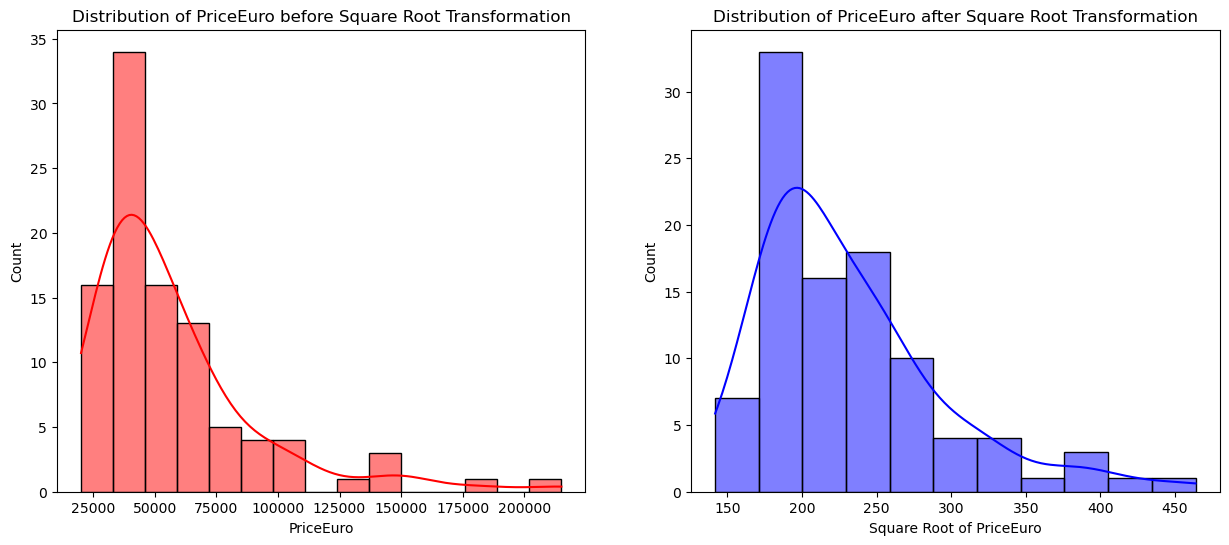

Skewness was 2.21 before & is 1.46 after Square Root transformation.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def square_root_transform_feature(feature):
    # Ensure the feature is numeric
    picked_data[feature] = pd.to_numeric(picked_data[feature], errors='coerce')

    # Check for non-negative values (as sqrt cannot be applied to negatives)
    if (picked_data[feature] < 0).any():
        print("Square root transformation requires all input data to be non-negative. Please adjust your data.")
        return
    
    # Handle NaN values (replace with mean, drop, etc.)
    picked_data[feature].fillna(picked_data[feature].mean(), inplace=True)

    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()

    # Apply square root transformation
    transformed_data = np.sqrt(picked_data[feature])
    
    # Visualization
    plt.figure(figsize=(15, 6))

    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(picked_data[feature], kde=True, color="red")
    plt.title(f"Distribution of {feature} before Square Root Transformation")

    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True, color="blue")
    plt.title(f"Distribution of {feature} after Square Root Transformation")
    plt.xlabel(f"Square Root of {feature}")
    plt.show()

    # Display skewness before and after transformation
    new_skew = transformed_data.skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after Square Root transformation.")

# Call the function for a specific feature (e.g., "AccelSec")
square_root_transform_feature(feature="PriceEuro")


### reciprocal transformation

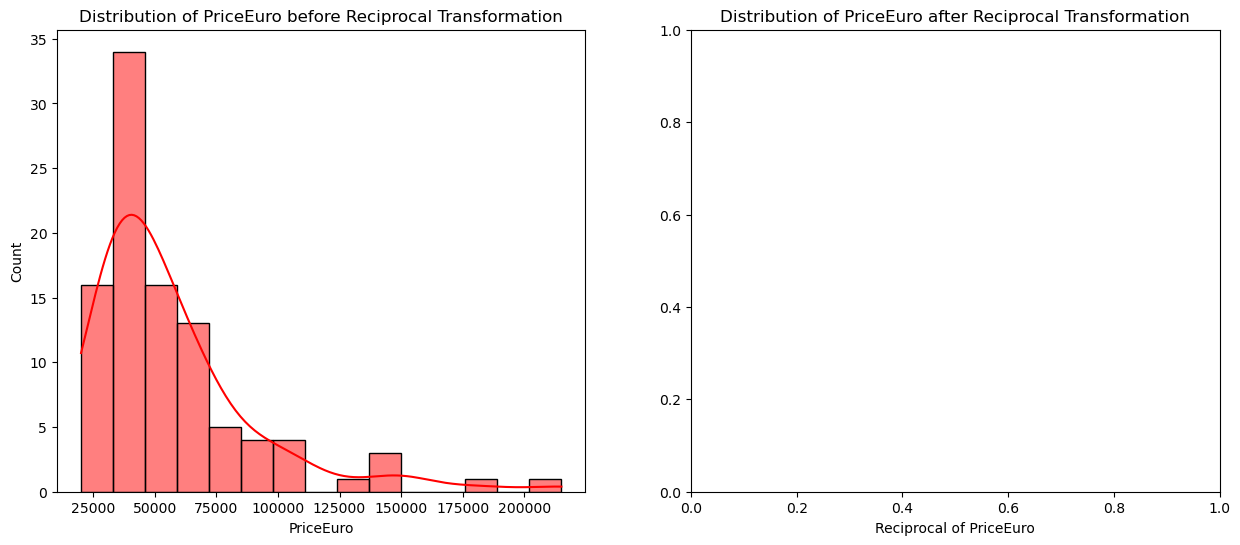

Skewness was 2.21 before & is nan after reciprocal transformation.


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def reciprocal_transform_feature(feature):
    # Check for zeros to avoid division by zero
    if (picked_data[feature] == 0).any():
        print("Warning: The feature contains zero values. The reciprocal transform cannot be applied to these values.")
        return

    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()

    # Apply reciprocal transformation
    transformed_data = 1 / picked_data[feature]
    transformed_df = pd.DataFrame(transformed_data, columns=[f'reciprocal_{feature}'])

    # Visualization
    plt.figure(figsize=(15, 6))

    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(picked_data[feature], kde=True, color="red")
    plt.title(f"Distribution of {feature} before Reciprocal Transformation")

    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[f'reciprocal_{feature}'], kde=True, color="blue")
    plt.title(f"Distribution of {feature} after Reciprocal Transformation")
    plt.xlabel(f"Reciprocal of {feature}")
    plt.show()

    # Display skewness before and after transformation
    new_skew = transformed_df[f'reciprocal_{feature}'].skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after reciprocal transformation.")

# Call the function for AccelSec
reciprocal_transform_feature(feature="PriceEuro")


### Cube Transformation

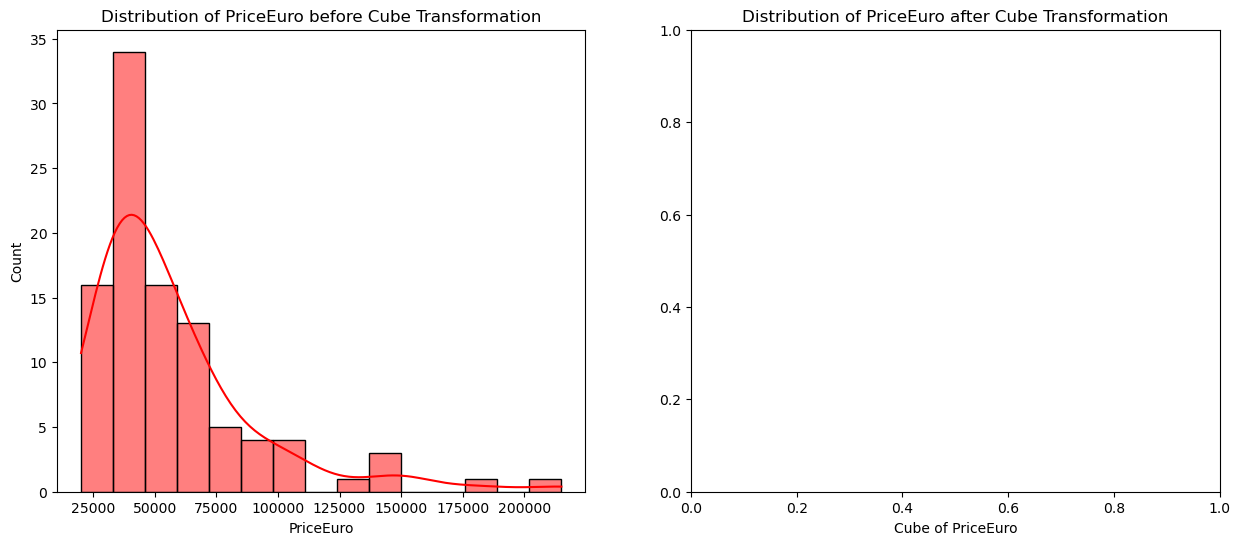

Skewness was 2.21 before & is nan after cube transformation.


In [24]:
def cube_transform_feature_with_nan_check(feature):
    # Check for NaN values
    if picked_data[feature].isnull().any():
        print("Warning: The feature contains NaN values. They will be handled before transformation.")
        picked_data[feature].fillna(0, inplace=True)  # Replace NaNs with 0 or another appropriate value

    # Check for non-numeric data
    try:
        picked_data[feature] = pd.to_numeric(picked_data[feature])
    except ValueError:
        print("Error: Non-numeric data found in the feature. Please clean your data.")
        return

    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()

    # Apply cube transformation
    transformed_data = picked_data[feature] ** 3
    transformed_df = pd.DataFrame(transformed_data, columns=[f'cube_{feature}'])

    # Visualization
    plt.figure(figsize=(15, 6))

    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(picked_data[feature], kde=True, color="red")
    plt.title(f"Distribution of {feature} before Cube Transformation")

    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[f'cube_{feature}'], kde=True, color="blue")
    plt.title(f"Distribution of {feature} after Cube Transformation")
    plt.xlabel(f"Cube of {feature}")
    plt.show()

    # Display skewness before and after transformation
    new_skew = transformed_df[f'cube_{feature}'].skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after cube transformation.")

# Call the function for AccelSec
cube_transform_feature_with_nan_check(feature="PriceEuro")


### BOX COX and YEO JOHNSON Transformation

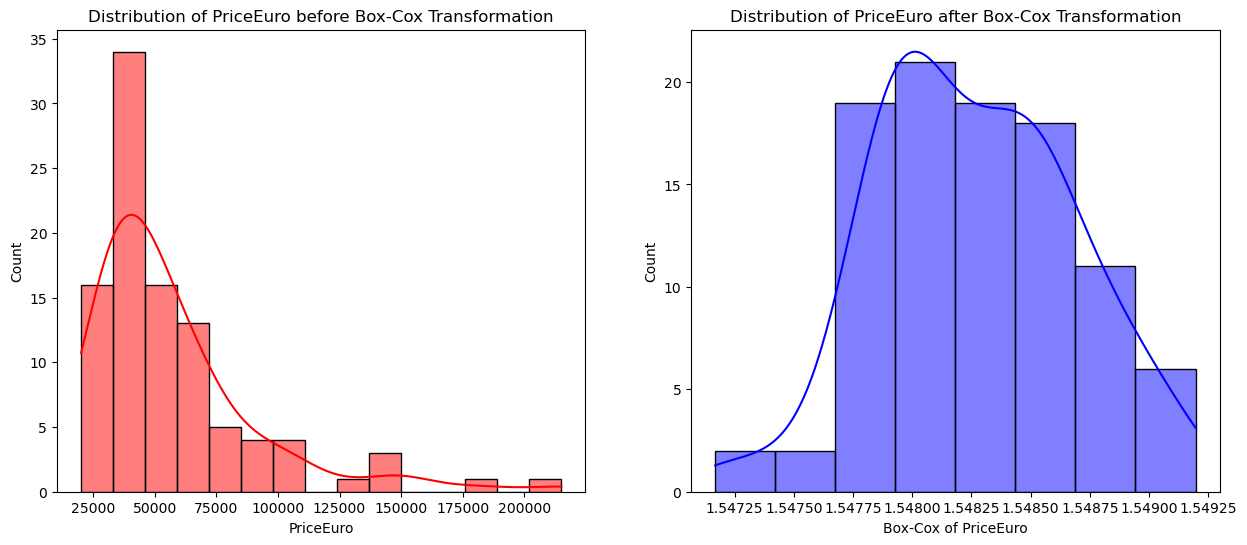

Skewness was 2.21 before & is 0.05 after Box-Cox transformation.


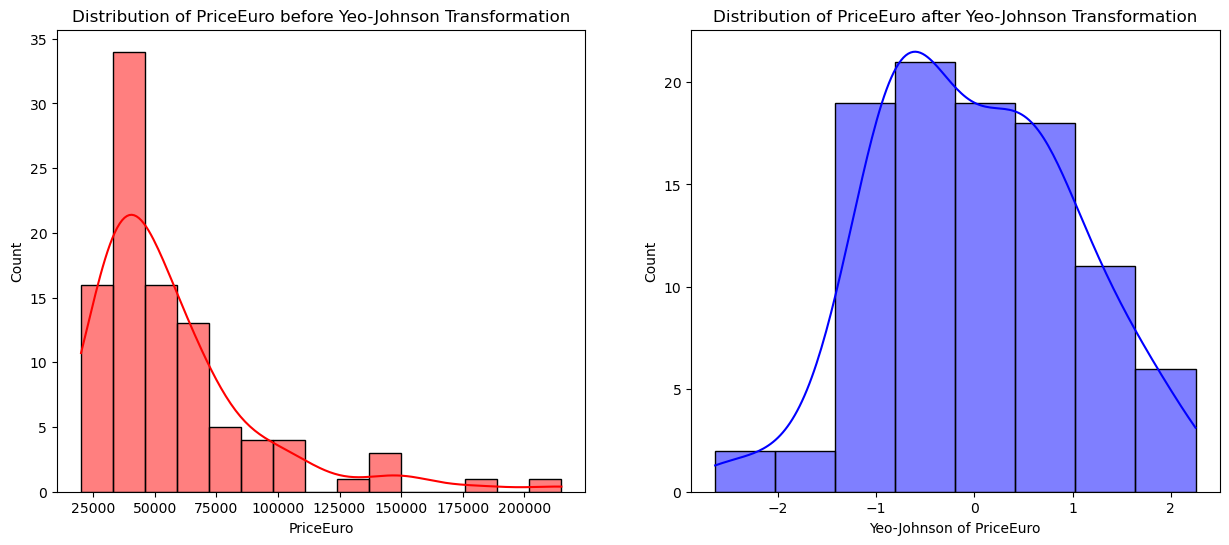

Skewness was 2.21 before & is 0.05 after Yeo-Johnson transformation.


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

def box_cox_transform_feature(feature):
    # Check for non-positive values for Box-Cox
    if (picked_data[feature] <= 0).any():
        print("Box-Cox transformation requires all input data to be positive. Please adjust your data.")
        return

    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()

    # Apply Box-Cox transformation
    transformed_data, lambda_param = stats.boxcox(picked_data[feature])
    transformed_df = pd.DataFrame(transformed_data, columns=[f'boxcox_{feature}'])

    # Visualization
    plt.figure(figsize=(15, 6))

    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(picked_data[feature], kde=True, color="red")
    plt.title(f"Distribution of {feature} before Box-Cox Transformation")

    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[f'boxcox_{feature}'], kde=True, color="blue")
    plt.title(f"Distribution of {feature} after Box-Cox Transformation")
    plt.xlabel(f"Box-Cox of {feature}")
    plt.show()

    # Display skewness before and after transformation
    new_skew = transformed_df[f'boxcox_{feature}'].skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after Box-Cox transformation.")

def yeo_johnson_transform_feature(feature):
    # Initialize the PowerTransformer with the Yeo-Johnson method
    transformer = PowerTransformer(method='yeo-johnson')

    # Calculate skewness before transformation
    old_skew = picked_data[feature].skew()

    # Fit and transform the data
    transformed_data = transformer.fit_transform(picked_data[[feature]])
    transformed_df = pd.DataFrame(transformed_data, columns=[f'yeo_johnson_{feature}'])

    # Visualization
    plt.figure(figsize=(15, 6))

    # Plotting the original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(picked_data[feature], kde=True, color="red")
    plt.title(f"Distribution of {feature} before Yeo-Johnson Transformation")

    # Plotting the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_df[f'yeo_johnson_{feature}'], kde=True, color="blue")
    plt.title(f"Distribution of {feature} after Yeo-Johnson Transformation")
    plt.xlabel(f"Yeo-Johnson of {feature}")
    plt.show()

    # Display skewness before and after transformation
    new_skew = transformed_df[f'yeo_johnson_{feature}'].skew()
    print(f"Skewness was {round(old_skew, 2)} before & is {round(new_skew, 2)} after Yeo-Johnson transformation.")

# Call the functions for AccelSec
box_cox_transform_feature(feature="PriceEuro")
yeo_johnson_transform_feature(feature="PriceEuro")


### Transformation Decision:
- Best Transformation BOX COX and YEO JOHNSON --> 0.05
- Worst Transformation Square Root
- Unknow result from CUBE and reciprocal (Data Points Limitation)

### Apply Box-Cox transformation to all variables

In [26]:

transformed_data, lambda_param = stats.boxcox(picked_data['PriceEuro'])
transformed_data, lambda_param = stats.boxcox(picked_data['AccelSec'])
transformed_data, lambda_param = stats.boxcox(picked_data['TopSpeed_KmH'])
transformed_data, lambda_param = stats.boxcox(picked_data['Range_Km'])
transformed_data, lambda_param = stats.boxcox(picked_data['Efficiency_WhKm'])
transformed_data, lambda_param = stats.boxcox(picked_data['FastCharge_KmH'])

### Scale Data

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming picked_data is already defined as your original DataFrame
# Display the original DataFrame
print("Original DataFrame:")
print(picked_data.head())

# Scale features using StandardScaler
scaler = StandardScaler()

# Drop the target variable and scale the features
scaled_features = scaler.fit_transform(picked_data.drop(columns=['PriceEuro']))

# Create a new DataFrame with the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=picked_data.columns[:-1])

# Create a new DataFrame that contains only the scaled features and the target variable
scaled_data = pd.concat([scaled_features_df, picked_data['PriceEuro']], axis=1)

# Display the updated DataFrame with only scaled features and the target variable
print("\nUpdated DataFrame with Scaled Features and Target Variable:")
print(scaled_data.head())  # Show the first few rows to verify


Original DataFrame:
   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
0       4.6           233       450              161           940.0   
1      10.0           160       270              167           250.0   
2       4.7           210       400              181           620.0   
3       6.8           180       360              206           560.0   
4       9.5           145       170              168           190.0   

   PriceEuro  
0      55480  
1      30000  
2      56440  
3      68040  
4      32997  

Updated DataFrame with Scaled Features and Target Variable:
   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
0 -0.990187      1.193357  0.848943        -0.965395        2.413510   
1  1.194996     -0.503240 -0.681497        -0.764741       -1.032469   
2 -0.949720      0.658813  0.423821        -0.296546        0.815375   
3 -0.099927     -0.038419  0.083723         0.539516        0.515725   
4  0.992664     -0.851856 -1.531741 

### Ridge Regression
- Ridge Regression is a type of linear regression that adds a regularization term to the loss function, specifically the L2 penalty. 
- Its main purpose is to prevent overfitting by shrinking the regression coefficients, especially when dealing with data that has multicollinearity (high correlation among predictors) or when the model has many features.
- Handling Multicollinearity, Preventing Overfitting, Improving Model Interpretation and Robustness

In [28]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assume scaled_data is already defined and is a DataFrame with no missing values
scaled_data = scaled_data.dropna()  # Remove rows with any NaN values

# Define features (X) and target (y)
X = scaled_data.drop('PriceEuro', axis=1)  # Features
y = scaled_data['PriceEuro']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up Ridge regression model with a regularization parameter (alpha)
ridge_model = Ridge(alpha=1e-7)  # alpha is equivalent to lambda

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (initial model): {mse}")

# Try different alpha values using RidgeCV
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.alpha_
print(f"Best alpha from CV: {best_alpha}")

# Use the best alpha to train the final model
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Calculate and print the optimized mean squared error
mse_optimized = mean_squared_error(y_test, y_pred)
print(f"Optimized Mean Squared Error: {mse_optimized}")


Mean Squared Error (initial model): 382763915.93489695
Best alpha from CV: 0.01
Optimized Mean Squared Error: 382675178.9650232


### Ridge Regression Insights:
- It may not significantly enhance model performance
- Impact from initial Model to Optimized Model is very small
- The best alpha from cross-validation is 0.01, which is a small regularization strength. This low alpha suggests that the data might not need strong regularization, as larger alphas did not yield better results
- In summary, the model performs adequately with Ridge, but the minimal improvement in MSE might indicate that Ridge regularization isn’t highly impactful for this dataset

### Lasso Regression
- In Lasso Regression, we introduce the L1 penalty to the linear regression model. 
- This regularization technique encourages sparsity in the model by driving some coefficients exactly to zero, which effectively removes certain features

In [29]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 1: Define features (X) and target (y)
X = scaled_data.drop('PriceEuro', axis=1)
y = scaled_data['PriceEuro']

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the data (Lasso is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize Lasso regression model with a chosen regularization strength (alpha)
lasso_model = Lasso(alpha=0.1)

# Step 5: Fit the model on training data
lasso_model.fit(X_train_scaled, y_train)

# Step 6: Predict on test data
y_pred = lasso_model.predict(X_test_scaled)

# Step 7: Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 8: Check which features were selected
print("Coefficients:", lasso_model.coef_)
print("Selected features (non-zero coefficients):", np.sum(lasso_model.coef_ != 0))

# Step 9: Get the names of selected features (non-zero coefficients)
selected_features = X.columns[lasso_model.coef_ != 0]
print("Selected Features:", selected_features.tolist())


Mean Squared Error: 382757854.2386332
Coefficients: [16526.58710402 21924.36322423 12700.85146212 -3537.89756148
   842.5984943 ]
Selected features (non-zero coefficients): 5
Selected Features: ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']


### Lasso Regression Insight
- Feature Reduction: 
  - With Lasso, we might expect some coefficients to be reduced to zero, depending on the relationship of each feature with the target variable. If certain features are less predictive, Lasso will exclude them from the model, leaving the most significant predictors.
  - MSE Comparison: The Mean Squared Error (MSE) from the Ridge Regression model was around 382,757,854.24. If there’s little or no increase, that would indicate the removed features weren’t highly influential.
  - Interpretability: If Lasso eliminates features, it can simplify the model, making it more interpretable by focusing only on the predictors that have the strongest relationships with the target.

### Linear Regression Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp

X=scaled_data.drop('PriceEuro',axis=1)
y=scaled_data['PriceEuro']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

test_predictions=lr.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

print(f'Train Score:{lr.score(X_train,y_train)}')
print(f'Test Score:{lr.score(X_test,y_test)}')



MAE: 16477.59699855966
MSE: 382763916.82341176
RMSE: 19564.35321761013
Train Score:0.31512973443217873
Test Score:-0.2609898307271765


### Partial Least Square Regression
- PLSRegression (Partial Least Squares Regression) is a regression technique used when dealing with highly collinear or high-dimensional data. Unlike Ridge and Lasso, which focus on regularizing the model by penalizing the coefficients, PLSRegression combines feature extraction with regression, aiming to reduce the predictors to a smaller set of uncorrelated components while maximizing the variance in the response variable

In [31]:
from sklearn.cross_decomposition import PLSRegression

pls=PLSRegression(n_components=5)
pls.fit(X_train,y_train)

test_predictions=pls.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

print(f'Train Score:{pls.score(X_train,y_train)}')
print(f'Test Score:{pls.score(X_test,y_test)}')

MAE: 16477.596998559657
MSE: 382763916.8234116
RMSE: 19564.35321761012
Train Score:0.3151297344321786
Test Score:-0.26098983072717585


### Random Forest
- A Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to produce a more robust, accurate prediction. It’s particularly effective for classification and regression tasks with complex data.

In [32]:
from sklearn.ensemble import RandomForestRegressor

rfg=RandomForestRegressor(n_jobs=-1,random_state=42)
rfg.fit(X_train,y_train)

test_predictions=rfg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

print(f'train score:{rfg.score(X_train,y_train)}')
print(f'test score:{rfg.score(X_test,y_test)}')

MAE: 16344.359964912283
MSE: 373448668.48886186
RMSE: 19324.82001181025
train score:0.8166043482092855
test score:-0.23030137524775118


### Decision Tree
- A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into branches based on feature values, creating a tree-like structure where each node represents a decision on a feature, and each branch represents the outcome of that decision.

Decision Tree MAE: 15659.486534746211
Decision Tree MSE: 349247844.88811207
Decision Tree RMSE: 18688.17393134257
Decision Tree train score: 0.4930690371124197
Decision Tree test score: -0.15057339903455258


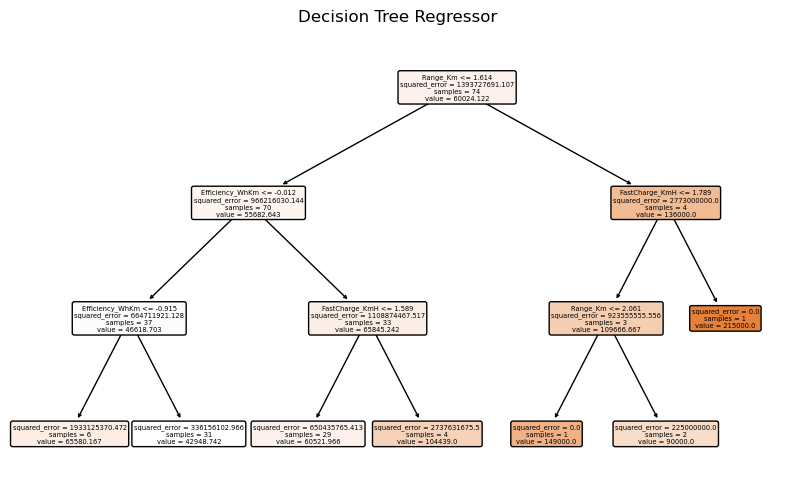

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Train Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)  # Adjust max_depth as needed
dtr.fit(X_train, y_train)

# Decision Tree Predictions and Evaluation
dt_test_predictions = dtr.predict(X_test)
print('Decision Tree MAE:', mean_absolute_error(y_test, dt_test_predictions))
print('Decision Tree MSE:', mean_squared_error(y_test, dt_test_predictions))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, dt_test_predictions)))

print(f'Decision Tree train score: {dtr.score(X_train, y_train)}')
print(f'Decision Tree test score: {dtr.score(X_test, y_test)}')

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(dtr, filled=True, feature_names=X.columns, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

### XGBoost (Extreme Gradient Boosting)
- a powerful, efficient, and scalable machine learning algorithm, especially popular in structured/tabular data applications. It’s an optimized implementation of Gradient Boosting, designed to handle both classification and regression problems with high accuracy and speed.

In [34]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize XGBoost Regressor
xgb_r = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, seed=123)

# Fit the model on training data
xgb_r.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = xgb_r.predict(X_test)

# Calculate and print evaluation metrics
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))

# Print training and testing scores
print(f'Train Score: {xgb_r.score(X_train, y_train)}')
print(f'Test Score: {xgb_r.score(X_test, y_test)}')


MAE: 17443.307154605263
MSE: 685418933.0333008
RMSE: 26180.506737519438
Train Score: 0.9792059335735231
Test Score: -1.2580663075971494


### AdaBoost (Adaptive Boosting) 
- a boosting ensemble algorithm that improves the accuracy of simple models, often decision trees, by combining multiple weak learners into a strong, accurate predictor. It’s commonly used for classification tasks but can also be adapted for regression.

In [35]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg=AdaBoostRegressor(n_estimators=100,learning_rate=1)

ada_reg.fit(X_train,y_train)

test_predictions=ada_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

print(f'Train Score:{ada_reg.score(X_train,y_train)}')
print(f'Test Score:{ada_reg.score(X_test,y_test)}')

MAE: 20771.828324396767
MSE: 641071822.3693329
RMSE: 25319.396169129566
Train Score:0.6825702038531793
Test Score:-1.1119677515120014
